In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

In [2]:
mnistData = load_data()

In [3]:
(x_train, y_train), (x_test, y_test) = mnistData

In [4]:
x_train = np.expand_dims(x_train, axis=-1)
x_train = x_train.astype('float32') / 255

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
y_train.shape

(60000,)

In [7]:
y_trainOne = to_categorical(y_train)

In [8]:
model = Sequential() #필터 갯수  #필터 사이즈  #몇칸씩 이동 # input shape에 color depth를 줘야 한다. 
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = 1, input_shape = (28, 28, 1),
                 activation = "relu", padding = "same" ) )
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu" ))
model.add(MaxPool2D(pool_size = (2,2))) # convolution max pool로 줘도 된다. 전부 architecture를 어떻게 구성할 까에 대한 부분은 개인의 판단.
model.add( Flatten(input_shape=(28,28,1))) # conv를 거친 값을 2차원으로 바꿔준다. 
model.add(Dense( units = 64, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax")) # output size가 10개기에 units= 10
model.compile( loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['acc'])
model.fit( x_train, y_trainOne, epochs = 1)

1875/1875 [==============================] - 53s 28ms/step - loss: 0.1172 - acc: 0.9643


In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
CM_train = confusion_matrix(y_train, model.predict( x_train.reshape(-1,28,28,1)).argmax(axis=1))

In [11]:
CM_test = confusion_matrix(y_test, model.predict(x_test.reshape(-1,28,28,1)).argmax(axis=1))

Text(33.0, 0.5, 'Real')

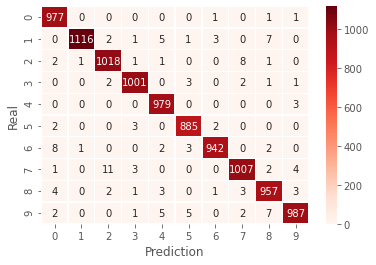

In [12]:
sns.heatmap(CM_test,
            annot=True,
            cmap='Reds',
            fmt = 'd',
            linewidths=0.25
           )
plt.xlabel('Prediction')
plt.ylabel('Real')

In [13]:
model.predict(x_test)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# fasion Mnist

In [14]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [15]:
fashion = load_data()
fashion

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [16]:
(x_train, y_train), (x_test, y_test) = fashion
x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train = np.expand_dims(x_train, axis=-1)

In [17]:
y_trainONE = to_categorical(y_train)
y_testONE = to_categorical(y_test)

In [18]:
x_train = x_train.reshape(-1, 28, 28, 1)

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(28,28,1), # fashion mnist data --> greyscale
                 activation='relu', padding='same')) # default padding - None (valid) --> True (same)
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2))) #가장 큰 값 출력?
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax')) #마지막은 분류갯수
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.6713 - acc: 0.8589
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2657 - acc: 0.9036
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2216 - acc: 0.9169
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1881 - acc: 0.9299
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1619 - acc: 0.9394
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1388 - acc: 0.9467
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1186 - acc: 0.9550
Epoch 8/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.1071 - acc: 0.9603
Epoch 9/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0949 - acc: 0.9653
Epoch 10/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0839 - acc: 0.9696


In [ ]:
 x_test

In [31]:
confusion_matrix(y_test, model.predict( x_test.reshape(-1,28,28,1)).argmax(axis=1))

ValueError: Found input variables with inconsistent numbers of samples: [10000, 60000]

In [21]:
CM_test = confusion_matrix(y_test, model.predict(x_test.reshape(-1,28,28,1)).argmax(axis=1))

Text(33.0, 0.5, 'Real')

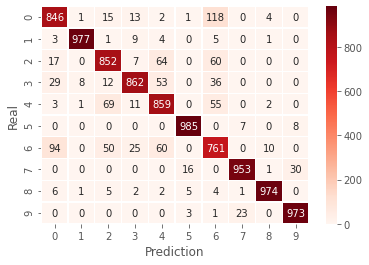

In [22]:
sns.heatmap(CM_test,
            annot=True,
            cmap='Reds',
            fmt = 'd',
            linewidths=0.25
           )
plt.xlabel('Prediction')
plt.ylabel('Real')

In [23]:
x_test.shape

(10000, 28, 28)

In [29]:
pred = model.predict(x_test.reshape(-1, 28, 28, 1))
model.evaluate(y_test,pred )

ValueError: in user code:

    File "C:\Users\13a71\anaconda3\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\13a71\anaconda3\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\13a71\anaconda3\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\13a71\anaconda3\lib\site-packages\keras\engine\training.py", line 1303, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\13a71\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\13a71\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_1" (type Sequential).
    
    Input 0 of layer "conv2d_2" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=uint8)
      • training=False
      • mask=None


# model save, load

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import pickle
import shelve
# pickle과 같은 역할을 하지만, 더 빠르게 저장을 해주는 개체 저장 프로그램

shleve.open()

In [ ]:
model.save('fashion_conv.h5')

In [ ]:
model

In [ ]:
model.history

In [ ]:
my=[10,20,30]

In [ ]:
import pickle

In [ ]:
fp = open( 'catdog.history','wb')
pickle.dump( h.history, fp)
fp.close()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
sp = open('fashion_conv.h5')

In [ ]:
sp

In [ ]:
shelve.open()

In [ ]:
model.history

In [ ]:
model.summury()

In [ ]:
x_train[0]

# model load

In [32]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [33]:
modelvgg16 = vgg16.VGG16() 

In [34]:
## model의 구조를 살펴보는 게 가능하다.
modelvgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
test_image = image.load_img('C:/Users/13a71/Dropbox/python숙달/data/depp/image2/test.jpg', target_size= (224, 224))

In [ ]:
imagearr = image.img_to_array(test_image).reshape(1,224,224,3)

In [ ]:
pred = modelvgg16.predict(imagearr)
pred

In [ ]:
label = decode_predictions(pred)
print(label)